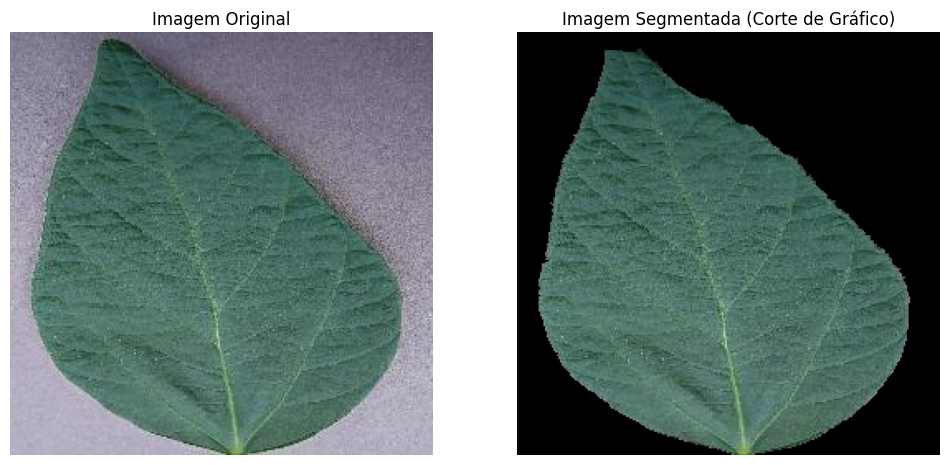

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def graph_based_segmentation(image):
    """
    Aplica a segmentação baseada em grafos em uma imagem usando o algoritmo GrabCut.
    
    Argumentos:
        image (np.array): Imagem de entrada em BGR.
        
    Retorno:
        segmented_image (np.array): Imagem segmentada onde o fundo é preto e o objeto é colorido.
    """
    # Inicializa a máscara
    mask = np.zeros(image.shape[:2], np.uint8)

    # Define a região de fundo e primeiro plano
    bgd_model = np.zeros((1, 65), np.float64)  # Modelo de fundo
    fgd_model = np.zeros((1, 65), np.float64)  # Modelo de primeiro plano

    # Define um retângulo que inclui a área de interesse
    # Ajuste os valores do retângulo conforme necessário
    rect = (10, 10, image.shape[1]-10, image.shape[0]-10)

    # Aplica o algoritmo GrabCut
    cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

    # Altera a máscara para que os pixels marcados como primeiro plano sejam 1
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

    # Multiplica a imagem original pela máscara para obter a imagem segmentada
    segmented_image = image * mask2[:, :, np.newaxis]

    return segmented_image

# Exemplo de uso
imagem = cv2.imread('imagemFolha.jpg')  # Substitua pelo caminho da sua imagem
segmented_image = graph_based_segmentation(imagem)

# Mostrando as imagens
plt.figure(figsize=(12, 6))

# Imagem original
plt.subplot(1, 2, 1)
plt.title("Imagem Original")
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Imagem segmentada
plt.subplot(1, 2, 2)
plt.title("Imagem Segmentada (Corte de Gráfico)")
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
